In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/concertriccir2.csv', names=['X','Y','class'], header=None)

In [3]:
df.head()

,X,Y,class
0,0.700335,-0.247068,0.0
1,-3.950019,2.740080,1.0
2,0.150222,-2.157638,1.0
3,-1.672050,-0.941519,1.0
4,2.560483,-1.846577,1.0


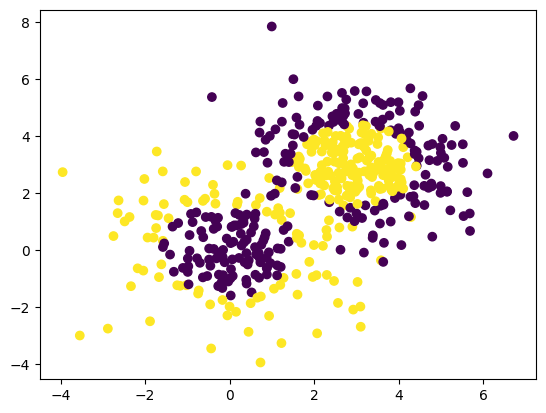

In [4]:
plt.scatter(df['X'],df['Y'],c=df['class'])

In [5]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [6]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization

In [7]:
model = Sequential()

model.add(Dense(16,activation='relu',input_dim=2))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │            48 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 337 (1.32 KB)

 Trainable params: 337 (1.32 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [9]:
history1 = model.fit(X,y,epochs=200,validation_split=0.2)

Epoch 1/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - accuracy: 0.5374 - loss: 0.7028 - val_accuracy: 0.4300 - val_loss: 0.7254
Epoch 2/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.5554 - loss: 0.6923 - val_accuracy: 0.4300 - val_loss: 0.7193
Epoch 3/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5514 - loss: 0.6860 - val_accuracy: 0.4300 - val_loss: 0.7092
Epoch 4/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5628 - loss: 0.6846 - val_accuracy: 0.4800 - val_loss: 0.7069
Epoch 5/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5712 - loss: 0.6759 - val_accuracy: 0.5000 - val_loss: 0.7060
Epoch 6/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5964 - loss: 0.6718 - val_accuracy: 0.4800 - val_loss: 0.7067
Epoch 7/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.5786 - loss: 0.6747 - val_accuracy: 0.4900 - val_loss: 0.7056
Epoch 8/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6009 - loss: 0.6718 - val_accuracy: 0.

In [10]:
model = Sequential()

model.add(Dense(16,activation='relu',input_dim=2))
model.add(BatchNormalization())
model.add(Dense(16,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 16)             │            48 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 465 (1.82 KB)

 Trainable params: 401 (1.57 KB)

 Non-trainable params: 64 (256.00 B)

In [11]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [12]:
history2 = model.fit(X,y,epochs=200,validation_split=0.2)

Epoch 1/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - accuracy: 0.5244 - loss: 0.7140 - val_accuracy: 0.4800 - val_loss: 0.7148
Epoch 2/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6154 - loss: 0.6625 - val_accuracy: 0.4300 - val_loss: 0.7210
Epoch 3/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6942 - loss: 0.6188 - val_accuracy: 0.4500 - val_loss: 0.7306
Epoch 4/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7141 - loss: 0.6164 - val_accuracy: 0.4600 - val_loss: 0.7378
Epoch 5/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7131 - loss: 0.5766 - val_accuracy: 0.4600 - val_loss: 0.7407
Epoch 6/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6686 - loss: 0.5851 - val_accuracy: 0.4600 - val_loss: 0.7437
Epoch 7/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7652 - loss: 0.5074 - val_accuracy: 0.4700 - val_loss: 0.7417
Epoch 8/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7787 - loss: 0.5103 - val_accuracy: 0.5000 -

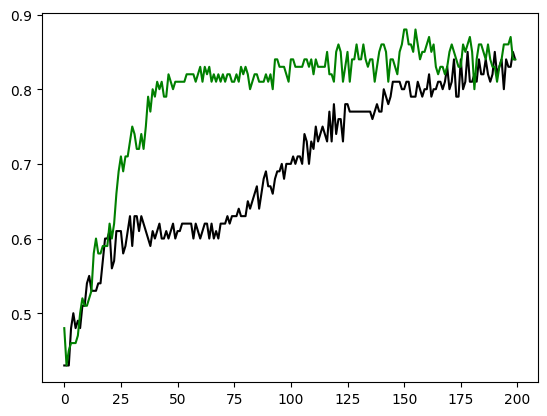

In [13]:
plt.plot(history1.history['val_accuracy'],color='black')
plt.plot(history2.history['val_accuracy'],color='green')

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


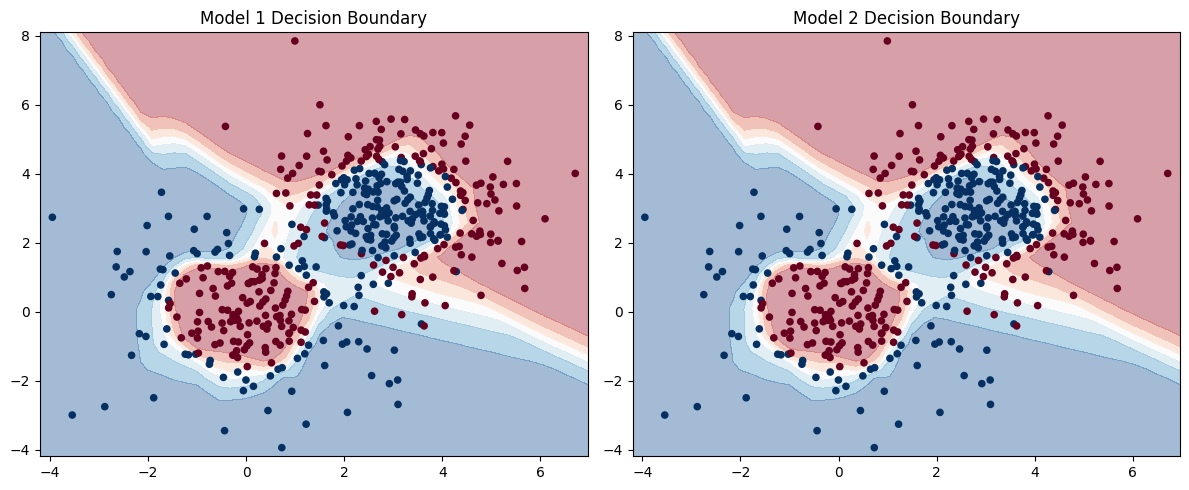

In [14]:
def plot_decision_boundary(X, y, model):
    x_span = np.linspace(min(X[:, 0]) - 0.25, max(X[:, 0]) + 0.25, 50)
    y_span = np.linspace(min(X[:, 1]) - 0.25, max(X[:, 1]) + 0.25, 50)
    xx, yy = np.meshgrid(x_span, y_span)
    xx_, yy_ = xx.ravel(), yy.ravel()
    grid = np.c_[xx_, yy_]
    pred_func = model.predict(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, z, cmap="RdBu", alpha=0.4)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title('Model 1 Decision Boundary')
plot_decision_boundary(X, y, model)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap='RdBu')

plt.subplot(1, 2, 2)
plt.title('Model 2 Decision Boundary')
plot_decision_boundary(X, y, model) # Re-use the second trained model
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap='RdBu')

plt.tight_layout()
plt.show()